# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch as tc
import matplotlib.pyplot as plt
from scipy.stats import kde
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
originaldata = pd.read_csv('Venta_Consumidor_Producto_UPC_PrevVTA_2018.csv')

There are a lot of columns with information about other columns, like descriptions, what I am going to do is remove the columns from original data which I am not interested in:
- ANO_MES_FACTURA: I can get it from MES_FACTURA and ANO_MES_FACTURA
- MATERIAL_ID: I can get it from TALLA + PRODUCTO_ID
- NUMERO_DEUDOR: the excel says I will not need it
- ETC
All of these are descriptive columns which don't add any kind of additional information to the data.

In [5]:
# Drop columns
dataset = originaldata.drop(columns=['ANO_MES_FACTURA', 'CANAL_VENTA_DESC', 'TEMPORADA_COMERCIAL_DESC', 'MATERIAL_ID', 'ESFUERZO_VENTA_DESC', 'NUMERO_DEUDOR', 'NUMERO_DEUDOR_PAIS_DESC', 'GRUPO_ARTICULO', 'CONCEPTO', 'LINEA', 'PAIS_CONTACTO_DESC'])
# Columns I have
dataset.columns

Index(['FACTURA_ID', 'FACTURA_POSICION_ID', 'CUSTOMER_ID',
       'FACTURA_CLASE_DOCUMENTO_ID', 'ANO_FACTURA', 'MES_FACTURA',
       'FECHA_FACTURA', 'IMP_VENTA_NETO_EUR', 'CANAL_VENTA_ID',
       'TEMPORADA_COMERCIAL_ID', 'PRODUCTO_ID', 'TALLA', 'ESFUERZO_VENTA_ID',
       'NUMERO_DEUDOR_PAIS_ID', 'VENTA_DEVOLUCION', 'JERARQUIA_PROD_ID',
       'GRUPO_ARTICULO_PRODUCTO_ID', 'GENERO_PRODUCTO', 'CATEGORIA',
       'TIPOLOGIA', 'COLOR', 'CONSUMER_COLOR', 'CONTACTO_SN', 'EDAD_SN',
       'GENERO_CONTACTO', 'EDAD_COMPRA', 'EDAD_RANGO_COMPRA', 'PAIS_CONTACTO',
       'CIUDAD_CONTACTO', 'IDIOMA_CONTACTO'],
      dtype='object')

First of all, I am going to see if there are missing data. In the file called Estructura Datos, it says that I used CANAL_VENTA_ID  = 20 because it will be the only one, that's not true, because there are more IDs, by the moment I only use 20 but it would be nice to know which one I should use.

In [6]:
dataset_missing_data = dataset[dataset.CANAL_VENTA_ID == 20]
dataset_missing_data.isnull().sum()

FACTURA_ID                        0
FACTURA_POSICION_ID               0
CUSTOMER_ID                     817
FACTURA_CLASE_DOCUMENTO_ID        0
ANO_FACTURA                       0
MES_FACTURA                       0
FECHA_FACTURA                     0
IMP_VENTA_NETO_EUR              963
CANAL_VENTA_ID                    0
TEMPORADA_COMERCIAL_ID            0
PRODUCTO_ID                       0
TALLA                          6615
ESFUERZO_VENTA_ID               781
NUMERO_DEUDOR_PAIS_ID             0
VENTA_DEVOLUCION                  0
JERARQUIA_PROD_ID                 0
GRUPO_ARTICULO_PRODUCTO_ID        0
GENERO_PRODUCTO                7936
CATEGORIA                      9044
TIPOLOGIA                     12841
COLOR                             0
CONSUMER_COLOR                 7166
CONTACTO_SN                       0
EDAD_SN                           0
GENERO_CONTACTO                 817
EDAD_COMPRA                       0
EDAD_RANGO_COMPRA                 0
PAIS_CONTACTO               

- CUSTOMER_ID: I am not interested in it, unless I could create a profile.
- IMP_VENTA_NETO_EUR: Ghost items sold
    - I can remove them
    - I can add 0 instead
- TALLA:
    - I can remove them
    - But I think it would be better to add NV (no informado) as it is used in other columns for the same purpose
- ESFUERZO_VENTA_ID: I don't know what is that
- GENERO_PRODUCTO: the basics are Kids, Women and Men. I can treat nulls as NV (no informado) or consider it as unisex. I prefer NV but I think it is important to keep and don't remove them, they can add value information although there are nulls
- CATEGORIA: I don't think this is an important column, I think I will not use it, by the moment I let them be null
- TIPOLOGIA: I don't think either it is an important column, as before I let them be null
- CONSUMER_COLOR: Same as before, I can use COLOR instead of this
- GENERO_CONTACTO: I am not sure what this is, I can put NV by the moment
- PAIS_CONTACTO: It can be interested to see what products are the most selled in each country and compare them. If one of the others columns refered to the customer are filled, I can extract the country, if not, the best thing I can do is to put NV
- CIUDAD_CONTACTO: Same as before, in this case, for me is not that relevant
- IDIOMA_CONTACTO: Same as before

There aren't NA/nan/Na and NV can only be found in the specified columns in the file I said before.

Now, I am going to analyse the profit by year. As I said before, I use CANAL_VENTA_ID = 20 (Online). Total year (2018) profit is more or less 24 milions of €/$ (?). So now, I will analyse in which months they earn more money. After, I will see what is the percentage got in each month from the total earnings.

Total year profit: 24813778.8€


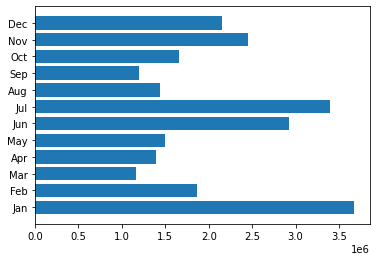

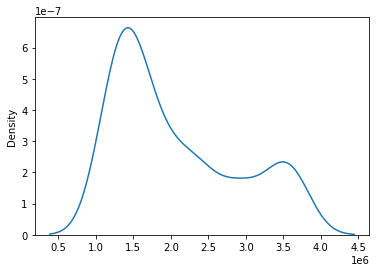

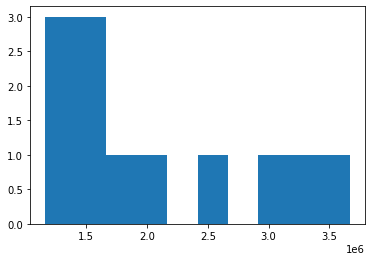

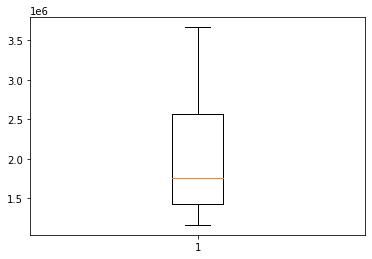

Benefit from each month(%):
Jan: 14.78% from total sales
Feb: 7.53% from total sales
Mar: 4.69% from total sales
Apr: 5.61% from total sales
May: 6.02% from total sales
Jun: 11.78% from total sales
Jul: 13.69% from total sales
Aug: 5.81% from total sales
Sep: 4.84% from total sales
Oct: 6.67% from total sales
Nov: 9.9% from total sales
Dec: 8.68% from total sales


In [7]:
total_year_sold = round(dataset[(dataset.CANAL_VENTA_ID == 20)].IMP_VENTA_NETO_EUR.sum(),2)
print('Total year profit: '+str(total_year_sold)+'€')
total_month_sold = round(dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['MES_FACTURA']).IMP_VENTA_NETO_EUR.sum(),2)
total_month_sold = np.array(total_month_sold)
name_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.barh(name_months, total_month_sold)
plt.show()

sns.kdeplot(total_month_sold, bw=0.3) # 0.2
plt.show()

plt.hist(total_month_sold, align= 'mid')
plt.show()

plt.boxplot(total_month_sold)
plt.show()

print('Benefit from each month(%):')
for i in range(0, 12):
    print(name_months[i]+': '+str(round(total_month_sold[i]/(total_year_sold)*100,2))+'% from total sales')




It can be seen in the first graph, the months where the profit is higher are January, June and July. Probably this is because the discounts they do (Sales), we will see it later.
As you can see in the second (density plot) and third (histogram plot) the distribution of the data. If I plot the distribution in quartiles, I can see that the median is closer to the lower quartile, I don't have outliers but the maximum value is large and far from the 3rd quartile.

Finally, Among Jan, June and July, Camper earns the 40% of the total year. It will be interesing to see if this happens in the next years (2019, 2020).

Now, I am going to extract are the bests selling products during the year. I have seen that there are products that are in negative, I think there are two reasons, or these products are sold in other year and this year the customer is returning the product (Weird but possible) or it is possible that the customers bought the product in site and they are returning the products via online.

SHOULD I INVESTIGATE IT? Well, it is possible that the data is wrong.

The top ten products are:

In [8]:
product_sales_year = round(dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['PRODUCTO_ID']).IMP_VENTA_NETO_EUR.sum(), 2)
top_product_sales = product_sales_year.sort_values(ascending = False).head(10)
print(product_sales_year.sort_values(ascending = False).head(10))

PRODUCTO_ID
21595-018      99268.89
20848-017      86711.76
K100243-001    85964.57
17665-014      85405.75
K300005-011    80323.87
K200564-001    74909.57
K200387-004    74226.67
18648-003      73275.18
17408-086      71227.02
K200157-002    71214.81
Name: IMP_VENTA_NETO_EUR, dtype: float64


It is interesting to see which are the bests selling products each month, in this way, we will be able to see if there's any month where the product hits a maximum. I will be focused on the top ten products. It is possible to do this for each product, in this way I would discover if there are any product that during the year has lower sells but when it is in sales, it has a boom. I AM NOT SURE ABOUT DOING THIS FOR EACH PRODUCT, BY THE MOMENT ONLY FOR TOP 10.

In [9]:
product_sales_month = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['MES_FACTURA','PRODUCTO_ID']).IMP_VENTA_NETO_EUR.sum()
product_sales_month = pd.DataFrame(product_sales_month)
months = []
product_id = []
money = []

for k, v in zip(product_sales_month.index, product_sales_month.IMP_VENTA_NETO_EUR):
    months.append(k[0])
    product_id.append(k[1])
    money.append(v)

In [10]:
product_month_sales = pd.DataFrame({
    'Month': months,
    'Product': product_id,
    'Money': money
})
for i in range(0, len(top_product_sales)):
    val_money = round(product_month_sales[(product_month_sales.Product == top_product_sales.index[i])].Money.max(), 2)
    print(product_month_sales[(product_month_sales.Product == top_product_sales.index[i]) & (product_month_sales.Money.astype(int) == val_money.astype(int))])    

      Month    Product     Money
8343      6  21595-018  13581.26
      Month    Product     Money
9929      7  20848-017  10228.74
       Month      Product     Money
10435      7  K100243-001  11047.11
      Month    Product     Money
9785      7  17665-014  14562.65
       Month      Product     Money
17346     11  K300005-011  45076.14
       Month      Product     Money
10837      7  K200564-001  29961.83
      Month      Product     Money
7560      5  K200387-004  12029.37
    Month    Product    Money
87      1  18648-003  8563.02
    Month    Product     Money
23      1  17408-086  12668.35
       Month      Product     Money
10595      7  K200157-002  39403.88


Looking at the results, 8/10 products are top sellers in jAN/June/July (Sales).

Now, I am going to analyse which season is more successful.

In [11]:
temporada_sales_year = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['TEMPORADA_COMERCIAL_ID']).IMP_VENTA_NETO_EUR.sum()
for k, v in zip(temporada_sales_year.index, temporada_sales_year):
    if k % 2 == 0:
        print('Temporada Primavera-Verano: '+str(round(v,2))+'€')
    else:
        print('Temporada Otoño-Invierno: '+str(round(v,2))+'€')

Temporada Otoño-Invierno: 5535627.38€
Temporada Primavera-Verano: 11809417.49€
Temporada Otoño-Invierno: 7468733.93€


In 2018, I have three commercial seasons (85, 86, 87).

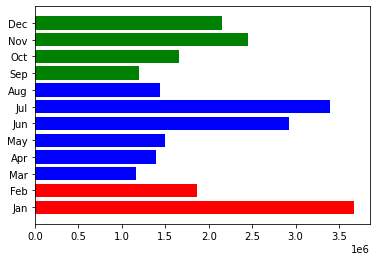

Rebaixes es quan hi ha el boom


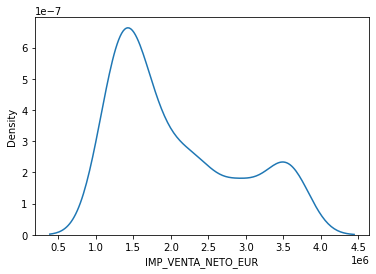

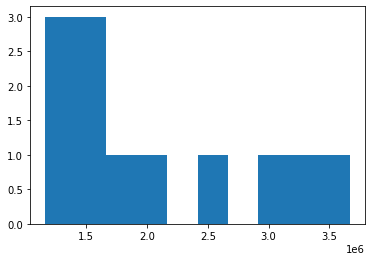

In [20]:
temporada_sales_month = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['MES_FACTURA', 'TEMPORADA_COMERCIAL_ID']).IMP_VENTA_NETO_EUR.sum()
months = []
sales = []
season = []
for k, v in zip(temporada_sales_month.index, temporada_sales_month):
    if v != 0:
        months.append(k[0])
        season.append(k[1])
        sales.append(v)
season_month_sales = pd.DataFrame({
    'Month': months,
    'Season': season,
    'Money': sales
})
name_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.barh(name_months, season_month_sales.Money, color= season_month_sales['Season'].map({85: 'red', 86: 'blue', 87: 'green'}))
plt.show()

sns.kdeplot(temporada_sales_month, bw=0.3) # 0.2
plt.show()

plt.hist(temporada_sales_month, align= 'mid')
plt.show()

In the first graphic you have the representation of the total sales by month considering each season. (85->red, 86->blue, 87->green).
As it can be seen in the distribution, it looks like a bimodal representation, where it reveals that there are two different types, when it is sales and when it is not. However there are only 3 months of sales, it conditions the density plot because they have a lot of weight (high volume).

Let's analyse the column called TALLA. As I haven't treat yet the missing values, by the moment I am not considering them.

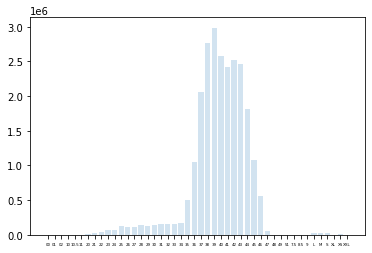

In [96]:
size_sales = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['TALLA']).IMP_VENTA_NETO_EUR.sum()
size_sales
sales = []
size = []
for k, v in zip(size_sales.index, size_sales):
    if v != 0:
        size.append(k)
        sales.append(v)
size_sales = pd.DataFrame({
    'Size': size,
    'Money': sales
})

plt.bar(size_sales.Size, size_sales.Money, alpha=0.2)
plt.tick_params(axis='x', which='major', labelsize=4)
plt.show()

I can see which size is the most sold for each product. As it is super big, it would be better to ask if they are interested in any product to filter.

In [22]:
product_size_sales = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['PRODUCTO_ID', 'TALLA']).IMP_VENTA_NETO_EUR.sum()
product_size_sales
products = []
sizes = []
sales = []

for k, v in zip(product_size_sales.index, product_size_sales):
    if v != 0:
        products.append(k[0])
        sizes.append(k[1])
        sales.append(v)
product_size_sales = pd.DataFrame({
    'Product': products,
    'Size': sizes,
    'Money': sales
})

product_size_sales['max'] = product_size_sales.groupby(['Product']).Money.transform(max)
products = []
sizes = []
sales = []
for _, v in product_size_sales.iterrows():
    if int(v['Money']) == int(v['max']):
      products.append(v['Product'])
      sizes.append(v['Size'])
      sales.append(v['Money'])

size_most_sold = pd.DataFrame({
    'Product': products,
    'Size': sizes,
    'Money': sales
})


Now, I am going to see the distribution of the data grouped by the genre. Same as before, I haven't treated the null variables yet so I am not considering them.

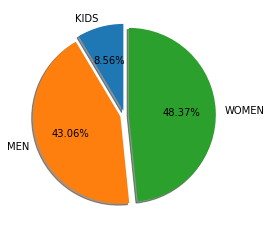

In [137]:
genre_sales_year = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['GENERO_PRODUCTO']).IMP_VENTA_NETO_EUR.sum()
genre = []
sales = []
for k, v in zip(genre_sales_year.index, genre_sales_year):
    genre.append(k)
    sales.append(v)
genre_sales_year = pd.DataFrame({
    'Genero': genre,
    'Money': sales
})
plt.pie(genre_sales_year.Money, explode=(0.05, 0.05, 0.05), labels= genre_sales_year.Genero, autopct='%1.2f%%', shadow= True, startangle= 90)
plt.show()

Looking at the pie chart, women are the most sold, with an almost the 50%, men are the next one with 43%. The genre kids is the worst in terms of sells. The market should be oriented in men and women. Also, they can extract from the data that one open market to exploit is Kids.

TEMPORADA_COMERCIAL_ID  GENERO_PRODUCTO
85                      KIDS                390155.54
                        MEN                2488542.87
                        WOMEN              2587208.30
86                      KIDS               1045029.98
                        MEN                4826139.12
                        WOMEN              5670594.48
87                      KIDS                647113.16
                        MEN                3155197.49
                        WOMEN              3503206.46
Name: IMP_VENTA_NETO_EUR, dtype: float64


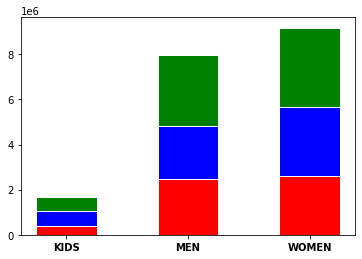

In [60]:
genre_season_sales = dataset[(dataset.CANAL_VENTA_ID == 20)].groupby(['TEMPORADA_COMERCIAL_ID', 'GENERO_PRODUCTO']).IMP_VENTA_NETO_EUR.sum()
print(genre_season_sales)
genre = []
seasons = []
sales = []
for k, v in zip(genre_season_sales.index, genre_season_sales):
    seasons.append(k[0])
    genre.append(k[1])
    sales.append(v)
genre_sales_year = pd.DataFrame({
    'Season': seasons,
    'Genero': genre,
    'Money': sales
})
plt.bar([0, 1, 2], genre_sales_year[genre_sales_year.Season == 85].Money, color= 'red', edgecolor='white', width=0.5)
plt.bar([0, 1, 2], genre_sales_year[genre_sales_year.Season == 86].Money, color= 'blue', bottom=genre_sales_year[genre_sales_year.Season == 85].Money, edgecolor='white', width=0.5)
plt.bar([0, 1, 2], genre_sales_year[genre_sales_year.Season == 87].Money, color= 'green', bottom=genre_sales_year[genre_sales_year.Season == 86].Money, edgecolor='white', width=0.5)
plt.xticks([0, 1, 2], ['KIDS', 'MEN', 'WOMEN'], fontweight='bold')
#plt.xlabel("Season")
plt.show()

Checking the results, (season: 85->red, 86->blue, 87->green). In all cases, the best season has been 87 (Otoño-Invierno). Also, the sales from Woman genre are always greater than the others not matter the season. We can see clearly the difference between the KIDS genre and the other two, as I commented previously.